<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 2

Se presentan de manera conjunta los **ejercicios 2a y 2d** ya que abordan una misma temática y son análisis que nos permiten **extraer conclusiones conjuntas**

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset


In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
#Vemos qué variables hay en nuestro dataset.
df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

## a) Densidad conjunta

### Presentación del Problema
Para este segundo ejercicio, abordamos la **situación de las mujeres en esta industria**, analizando el **salario**, la **jerarquía del puesto** en función de la cantidad de personas a cargo y la **cantidad de años de experiencia** en función del género. Abordamos también las **situaciones de violencia** dentro de la organización en función del género. Luego profundizamos en las relaciones entre algunas de estas variables, contemplando la intervención del género.

**VARIABLES SELECCIONADAS**

**Variables Categóricas:** Género y Situaciones de Violencia en la Organización

**Variables Numéricas:** Salario neto, Personas a Cargo, Años de experiencia

### EXPLORACIÓN Y LIMPIEZA DEL DATASET

In [3]:
#seleccionamos las variables con las que vamos a trabajar
df2 = df [["profile_gender", "profile_years_experience", "work_people_in_charge_of", "work_has_violence_situations", "salary_monthly_NETO"]]
df2[:5]

,profile_gender,profile_years_experience,work_people_in_charge_of,work_has_violence_situations,salary_monthly_NETO
0,Mujer,3.0,0,En mi trabajo actual,43000.0
1,Hombre,5.0,4,Jamás,63000.0
2,Mujer,2.0,0,En un trabajo anterior,127000.0
3,Hombre,15.0,5,En mi trabajo actual,102000.0
4,Hombre,9.0,0,Jamás,106000.0


In [4]:
#Ahora empezamos a explorar las distribuciones para identificar casos atípicos y tratarlos. 
#por la forma de recolección de datos, sabemos que las variables nominales que tienen opciones pre-establecidas no pueden
#tener casos atípicos o erróneos.
#Necesitamos explorar las variables numéricas que son aquellas que las personas completaban manualmente

df2.describe()

#No es posible que haya personas con 115 años de experiencia, tampoco es posible que las personas cobren 1 peso y, sería raro,
#que las personas cobraran dos millones (sobre esto ya trabajamos en el ejercicio 1).Profundicemos en c/u

,profile_years_experience,work_people_in_charge_of,salary_monthly_NETO
count,6095.000000,6095.000000,5.883000e+03
mean,8.930861,2.211649,9.490795e+04
std,7.161094,32.983395,9.686226e+04
min,0.000000,0.000000,1.000000e+00
25%,3.000000,0.000000,5.148000e+04
50%,7.000000,0.000000,7.800000e+04
75%,13.000000,0.000000,1.060000e+05
max,115.000000,2500.000000,2.080000e+06


In [5]:
max_limit = df2["profile_years_experience"].quantile(.98)
print("El percentil 98 de años de experiencia es", max_limit)

El percentil 98 de años de experiencia es 27.0


In [6]:
df2 = df2[(df2["profile_years_experience"]<=max_limit)]
df2[:5]

,profile_gender,profile_years_experience,work_people_in_charge_of,work_has_violence_situations,salary_monthly_NETO
0,Mujer,3.0,0,En mi trabajo actual,43000.0
1,Hombre,5.0,4,Jamás,63000.0
2,Mujer,2.0,0,En un trabajo anterior,127000.0
3,Hombre,15.0,5,En mi trabajo actual,102000.0
4,Hombre,9.0,0,Jamás,106000.0


In [7]:
max_limit = df2["salary_monthly_NETO"].quantile(.98)
print("El percentil 98 es de la varible Salario Mensual Neto es", max_limit)

El percentil 98 es de la varible Salario Mensual Neto es 370000.0


In [8]:
min_limit = 10000
print(min_limit)

10000


In [9]:
df2 = df2[(df2["salary_monthly_NETO"]<=max_limit) & (df2["salary_monthly_NETO"]>=min_limit)]
df2[:5]

,profile_gender,profile_years_experience,work_people_in_charge_of,work_has_violence_situations,salary_monthly_NETO
0,Mujer,3.0,0,En mi trabajo actual,43000.0
1,Hombre,5.0,4,Jamás,63000.0
2,Mujer,2.0,0,En un trabajo anterior,127000.0
3,Hombre,15.0,5,En mi trabajo actual,102000.0
4,Hombre,9.0,0,Jamás,106000.0


In [10]:
#No trabajamos con casos atípicos en la variable de cantidad de personas a cargo porque no hay valores que sean particularmente 
#extraños o imposibles (el máximo es 300)
df2.describe()

,profile_years_experience,work_people_in_charge_of,salary_monthly_NETO
count,5469.000000,5469.000000,5469.000000
mean,8.409965,1.699762,87476.839788
std,6.379524,7.713589,51462.761384
min,0.000000,0.000000,10000.000000
25%,3.000000,0.000000,53500.000000
50%,7.000000,0.000000,78000.000000
75%,13.000000,0.000000,105000.000000
max,27.000000,300.000000,370000.000000


### ANÁLISIS DESCRIPTIVOS
Una vez que tenemos nuestros df curado (**df2**), podemos iniciar nuestros análisis descriptivos

In [11]:
tab=pd.value_counts(df2['profile_gender'])*100 / 5469

print ("porcentaje de personas de cada género")
tab

porcentaje de personas de cada género


Hombre    84.000731
Mujer     15.542147
Otros      0.457122
Name: profile_gender, dtype: float64

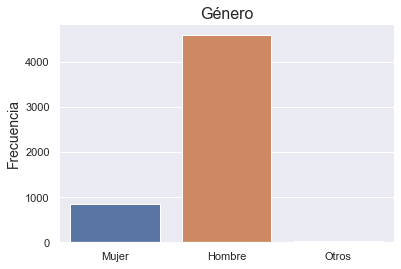

In [76]:
fig = plt.figure(figsize=(6,4))
seaborn.countplot(data=df2, x="profile_gender")
plt.title('Género', size=16)
plt.xlabel('')
plt.ylabel('Frecuencia', size=14)
seaborn.despine()

De acuerdo a los datos de esta encuesta, las **mujeres y otras identidades de género** son una minoría en esta industria (solo el 16% no son hombres). 

In [14]:
# Calculamos las medidas de centralización y dispersión para la variable años de experiencia en el perfil para cada subpoblación
df_mujer = df2[(df2['profile_gender']=='Mujer')]
df_hombre = df2[(df2['profile_gender']=='Hombre')]
df_otros = df2[(df2['profile_gender']=='Otros')]

df_mujer1 = df_mujer[['profile_years_experience']].describe().round()
df_mujer1 = df_mujer1.rename(columns={'profile_years_experience':'Mujer'})

df_hombre1 = df_hombre[['profile_years_experience']].describe().round()
df_hombre1 = df_hombre1.rename(columns={'profile_years_experience':'Hombre'})

df_otro1 = df_otros[['profile_years_experience']].describe().round()
df_otro1 = df_otro1.rename(columns={'profile_years_experience':'Otros'})

description = pd.concat([df_mujer1,df_hombre1, df_otro1], axis=1)
print("Estadísticos descriptivos de años de experiencia según género")
description

Estadísticos descriptivos de años de experiencia según género


,Mujer,Hombre,Otros
count,850.0,4594.0,25.0
mean,7.0,9.0,5.0
std,6.0,6.0,5.0
min,0.0,0.0,0.0
25%,2.0,3.0,2.0
50%,5.0,8.0,4.0
75%,10.0,13.0,7.0
max,27.0,27.0,20.0


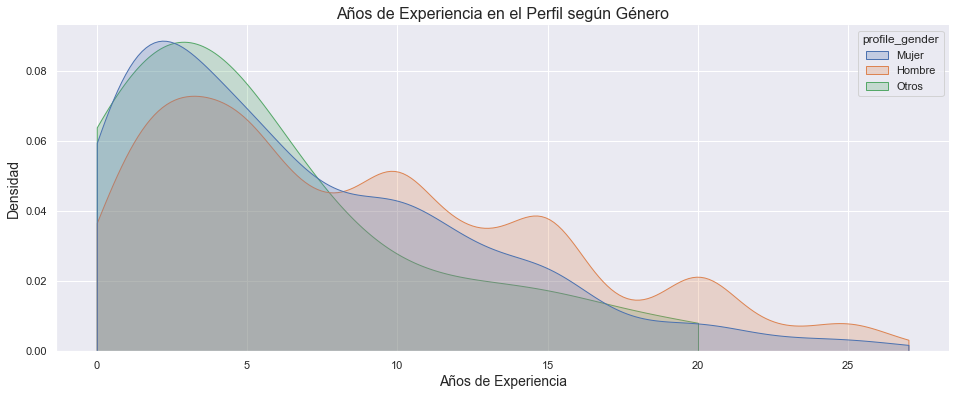

In [75]:
#Acá vemos la distribución de los años de experiencia en función del género. El cálculo de la densidad no es conjunta, entonces
#nos enfocamos en la forma de la distribución en cada grupo (repetimos esto para todas las variables cuantitativas)
seaborn.set(style="darkgrid")
plt.figure(figsize=(16, 6))
seaborn.kdeplot(data=df2, x="profile_years_experience", hue="profile_gender", common_norm=False, shade=True, cut=0)
plt.title('Años de Experiencia en el Perfil según Género', size=16)
plt.xlabel('Años de Experiencia', size=14)
plt.ylabel('Densidad', size=14)
seaborn.despine()

Las mujeres y otras identidades de género tienen una menor antigüedad que los varones. Esto podría indicar que **son grupos que se han ido incorporando más recientemente a la industria**. 

In [16]:
# # Calculamos las medidas de centralización y dispersión para la variable Salario Mensual neto para cada subpoblación
df_mujer2 = df_mujer[['salary_monthly_NETO']].describe().round()
df_mujer2 = df_mujer2.rename(columns={'salary_monthly_NETO':'Mujer'})

df_hombre2 = df_hombre[['salary_monthly_NETO']].describe().round()
df_hombre2 = df_hombre2.rename(columns={'salary_monthly_NETO':'Hombre'})

df_otro2 = df_otros[['salary_monthly_NETO']].describe().round()
df_otro2 = df_otro2.rename(columns={'salary_monthly_NETO':'Otros'})

description = pd.concat([df_mujer2,df_hombre2, df_otro2], axis=1)
print("Estadísticos descriptivos de Salario Mensual Neto según género")
description


Estadísticos descriptivos de Salario Mensual Neto según género


,Mujer,Hombre,Otros
count,850.0,4594.0,25.0
mean,75166.0,89743.0,89668.0
std,40253.0,52902.0,64279.0
min,10000.0,10000.0,34000.0
25%,48035.0,55000.0,40000.0
50%,67112.0,80000.0,74000.0
75%,92978.0,107000.0,115000.0
max,340000.0,370000.0,312000.0


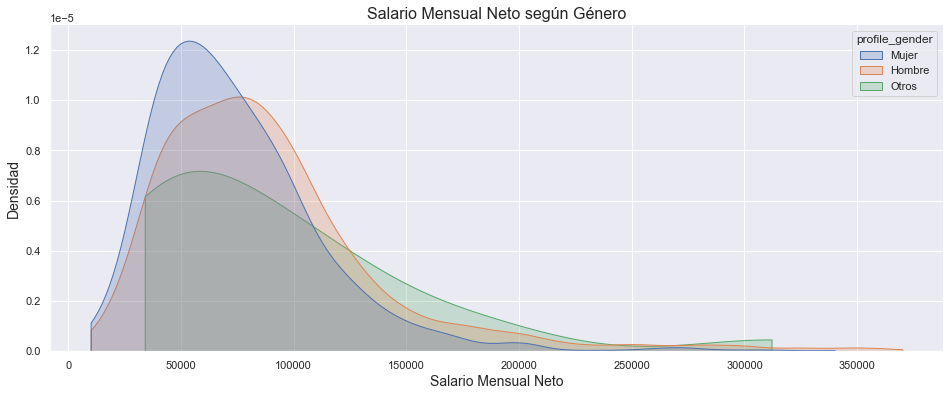

In [74]:
#veamos ahora la distribución de salario en función del género
seaborn.set(style="darkgrid")
plt.figure(figsize=(16, 6))
seaborn.kdeplot(data=df2, x="salary_monthly_NETO", hue="profile_gender", common_norm=False, shade=True, cut=0)
plt.title('Salario Mensual Neto según Género', size=16)
plt.xlabel('Salario Mensual Neto', size=14)
plt.ylabel('Densidad', size=14)
seaborn.despine()

Las medias de los salarios de **Hombres y otras identidades de género son muy parecidas** (M=89.743 y M=89.688 respectivamente), aunque la dispersión es mayor en el grupo "otros". Sin embargo, **las mujeres tienden a tener salarios más bajos (M=75.166)** y el 75% de ellas cobra menos de 100.000. 

In [18]:
# Calculamos las medidas de centralización y dispersión para la variable personas a cargo para cada subpoblación
df_mujer3 = df_mujer[['work_people_in_charge_of']].describe().round()
df_mujer3 = df_mujer3.rename(columns={'work_people_in_charge_of':'Mujer'})

df_hombre3 = df_hombre[['work_people_in_charge_of']].describe().round()
df_hombre3 = df_hombre3.rename(columns={'work_people_in_charge_of':'Hombre'})

df_otro3 = df_otros[['work_people_in_charge_of']].describe().round()
df_otro3 = df_otro3.rename(columns={'work_people_in_charge_of':'Otros'})

description = pd.concat([df_mujer3,df_hombre3, df_otro3], axis=1)

mediana_m= df_mujer3["Mujer"].median()
mediana_h= df_hombre3["Hombre"].median()
mediana_o= df_otro3["Otros"].median()

print("La mediana de personas a cargo para hombres es", mediana_h, 
      "para mujeres es", mediana_m, 
      "para otras identidades es", mediana_o,)

print("Estadísticos descriptivos de Cantidad de Personas a Cargo según género")
description

La mediana de personas a cargo para hombres es 1.0 para mujeres es 0.5 para otras identidades es 0.5
Estadísticos descriptivos de Cantidad de Personas a Cargo según género


,Mujer,Hombre,Otros
count,850.0,4594.0,25.0
mean,1.0,2.0,1.0
std,5.0,8.0,2.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,60.0,300.0,7.0


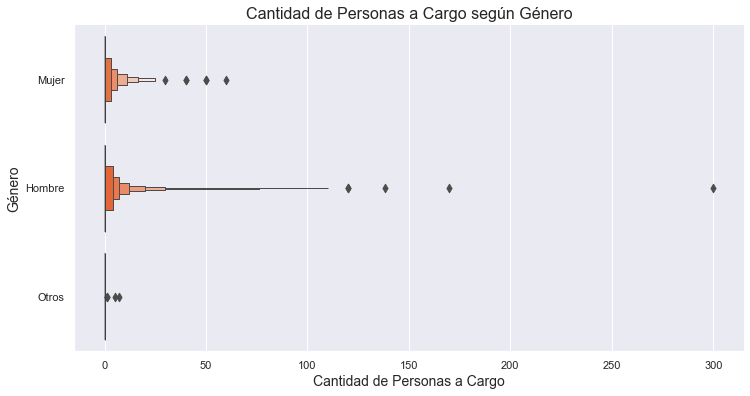

In [73]:
#ploteamos la distribución de personas a cargo según género.
#como tenemos una concentración muy alta en torno al 0 (el 75% de los casos o más son 0) y casos muy atípicos, 
#seleccionamos este gráfico que nos permite visualizarlos mejor, porque es un dato que nos interesa. 
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df2, x="work_people_in_charge_of", y='profile_gender',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Cantidad de Personas a Cargo según Género', size=16)
plt.xlabel('Cantidad de Personas a Cargo', size=14)
plt.ylabel('Género', size=14)
seaborn.despine()

Como se ve, la enorme mayoría de los y las trabajadoras de la industria no tiene personas a cargo. Sin embargo, en este marco, **son los hombres quienes suelen tener más personas a cargo**. Mientras que las mujeres que tienen más personas a cargo tienen 60, los hombres tienen hasta 300. Las personas de otras identidades tienen un máximo de 7 personas a cargo. 

In [20]:
# situaciones de violencia según género. Frecuencias. 
print("Situaciones de violencia según Género")
pd.crosstab(df2.work_has_violence_situations, df2.profile_gender, margins = True)

Situaciones de violencia según Género


profile_gender,Hombre,Mujer,Otros,All
work_has_violence_situations,,,,
En mi trabajo actual,379,119,4,502
En un trabajo anterior,841,311,13,1165
Jamás,3270,403,8,3681
All,4490,833,25,5348


In [21]:
# situaciones de violencia según género. Frecuencias relativas calculadas por columna. 
print("Situaciones de violencia según Género. Frecuencias relativas por columna")
pd.crosstab(df2.work_has_violence_situations, df2.profile_gender, margins = True, normalize=1)

Situaciones de violencia según Género. Frecuencias relativas por columna


profile_gender,Hombre,Mujer,Otros,All
work_has_violence_situations,,,,
En mi trabajo actual,0.084410,0.142857,0.16,0.093867
En un trabajo anterior,0.187305,0.373349,0.52,0.217838
Jamás,0.728285,0.483794,0.32,0.688295


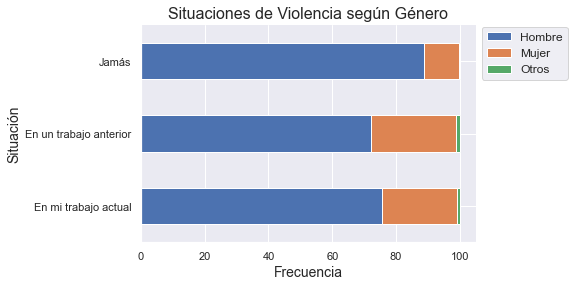

In [72]:
#Acá se graficó la frecuencia de situaciones de violencia en función del género. Se normalizaron las barras de modo tal que 
#cada barra sume un 100% dado que, cómo los casos de violencia son proporcionalmente "pocos", era difícil visualizar si había
#diferencias en función de género. 

df2_plot = df2.groupby(['profile_gender', 'work_has_violence_situations']).size().reset_index().pivot(columns='profile_gender', index='work_has_violence_situations', values=0)
seaborn.set_theme(style="darkgrid")
stacked_data = df2_plot.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1, 0.72), loc=3, prop={'size': 12}, frameon=True)
plt.title('Situaciones de Violencia según Género', size=16)
plt.xlabel('Frecuencia', size=14)
plt.ylabel('Situación', size=14)

seaborn.despine()

El **60% de las personas declaró que nunca sufrió situaciones de violencia en su lugar de trabajo**. Cuando vemos esa situación por género, encontramos que **más del 50% de las mujeres y el 68% de las personas de otras identidades de género padecieron situaciones de violencia** (ya sea en el trabajo actual o en uno anterior). En el caso de los hombres, este porcentaje no alcanza el 30%. 

Esta diferencia es notable y, sumada a la situación de ser minoría en el rubro, la percepción de menores salarios y menores responsabilidades, aportan **evidencia preliminar de las desigualdades estructurales en el acceso y calidad del ambiente laboral en función del género**. 

### En el siguiente apartado profundizamos en algunas relaciones entre variables que complementan la perspectiva sobre esta temática

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


### Variables seleccionadas: 

#### categórica: "profile_gender"
#### numéricas: "work_people_in_charge_of" / "profile_years_experience"

Como ya estuvimos trabajando sobre estas variables en el ejericio anterior, no es necesario volver a curar nuestro dataset.
Nos abocamos directamente a estimar asociaciones entre nuestras variables de interés, en función del género. 

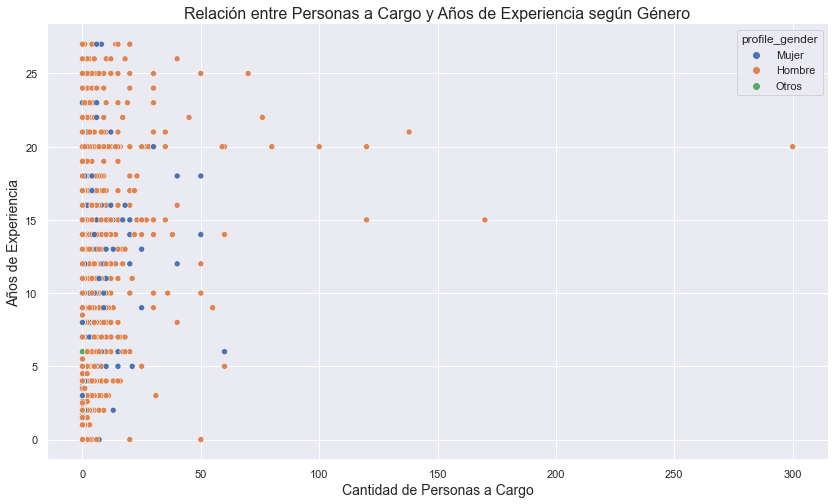

In [81]:
fig = plt.figure(figsize=(14,8))
seaborn.scatterplot(x="work_people_in_charge_of", y="profile_years_experience", hue="profile_gender", data=df2)
plt.title('Relación entre Personas a Cargo y Años de Experiencia según Género', size=16)
plt.xlabel('Cantidad de Personas a Cargo', size=14)
plt.ylabel('Años de Experiencia', size=14)
seaborn.despine()

**No se identifica una relación lineal entre los años de experiencia y la cantidad de personas a cargo**. Es posible que, en este campo laboral, **el crecimiento en un puesto no implique necesariamente coordinación o supervisión de grandes grupos de trabajo**. De hecho, la enorme mayoría de la muestra tenía menos de 5 personas a cargo. 


**Es posible, entonces, que este no sea un buen indicador para conocer la jerarquía del puesto¨** y sea el **salario** una variable **más apropiada** para aproximarnos a ello indirectamente. 

## UN PLUS

En función de lo anterior, buscamos la **relación entre salario neto y años de experiencia, segmentado por género**.
Esta inquietud surge por dos razones:
 1.  En función del análisis anterior, nos inquietaba saber si hay **diferencias en un "crecimiento" en salario según los años de experiencia en el perfil entre hombres y mujeres**. 
 
 2. en nuestro ejericio 2 encontramos evidencia indirecta de que la edad podría explicar diferencias aparentes en el nivel de ingresos según nivel educativo, de lo que surge una **hipótesis sobre la relación entre salario y años de experiencia**. 

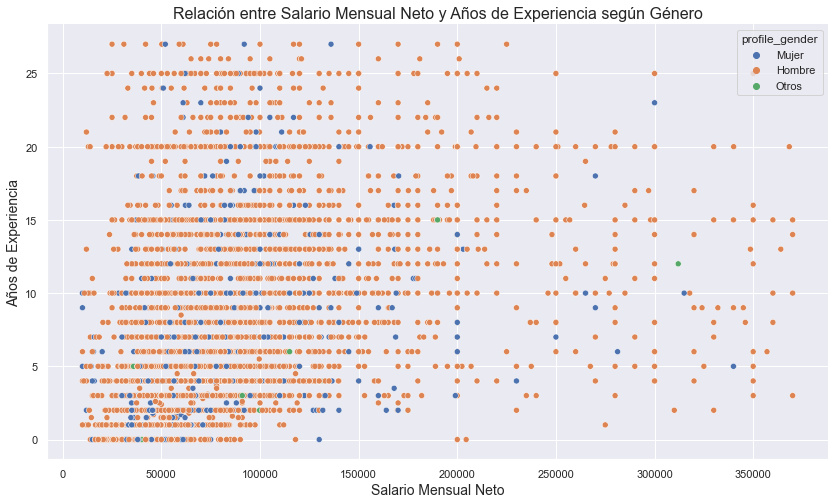

In [83]:
#para evitar volver a editar el dataset, trabajamos con nuestro df2
fig = plt.figure(figsize=(14,8))
seaborn.scatterplot(x="salary_monthly_NETO", y="profile_years_experience", hue="profile_gender", data=df2)
plt.title('Relación entre Salario Mensual Neto y Años de Experiencia según Género', size=16)
plt.xlabel('Salario Mensual Neto', size=14)
plt.ylabel('Años de Experiencia', size=14)
seaborn.despine()

No parece haber una relación lineal entre el salario y los años de experiencia, pero sí parece que no ser hombre es una traba importante para acceder a los niveles más altos de salario

# CONCLUSIÓN 

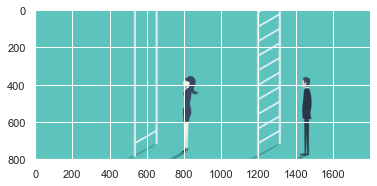

In [68]:
from skimage import io
image=io.imread("https://escriturafeminista.files.wordpress.com/2019/12/techo.jpg")


plt.imshow(image,vmin=0,vmax=1)

seaborn.despine()